In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

episodes_character = pd.read_csv("../data/charactersepisode.csv")
lines = pd.read_csv("../data/lines.csv") 

In [2]:
episodes_character.head()

,episode_id,complete_name,first_name,last_name
0,0,Michael Scott,Michael,Scott
1,0,Dwight Schrute,Dwight,Schrute
2,0,Jim Halpert,Jim,Halpert
3,0,Pam Beesly,Pam,Beesly
4,0,Ryan Howard,Ryan,Howard


In [3]:
len(episodes_character["episode_id"].unique())

186

In [4]:
df_group = episodes_character.groupby(['first_name']).size().reset_index(name='counter')
df_group = df_group.sort_values(by = "counter", ascending=False)
df_group["percentage"] = (df_group["counter"] / len(episodes_character["episode_id"].unique())) * 100
df_group = df_group.astype({"percentage": int})
df_group = df_group.set_index('first_name')

In [5]:
df_group.head()

,counter,percentage
first_name,,
Jim,186,100
Stanley,186,100
Pam,186,100
Dwight,186,100
Kevin,186,100


In [6]:
df_group.loc[["Dwight"], ["percentage"]].values[0][0]

100

In [7]:
def episodios(personaje):
    df_group = episodes_character.groupby(['first_name']).size().reset_index(name='counter')
    df_group = df_group.sort_values(by = "counter", ascending=False)
    df_group["percentage"] = (df_group["counter"] / len(episodes_character["episode_id"].unique())) * 100
    df_group = df_group.astype({"percentage": int})
    df_group = df_group.set_index('first_name')
    numero = df_group.loc[[f"{personaje}"], ["percentage"]].values[0][0]
    return f"{personaje} has appeared in {numero} percent of the episodes 🤗"

In [8]:
episodios("Michael")

'Michael has appeared in 73 percent of the episodes 🤗'

In [9]:
def season(personaje):
    df_distinct = lines.drop_duplicates(subset=['season', 'episode', 'scene','first_name'])
    num_distinct = len(lines.drop_duplicates(subset=['season', 'episode', 'scene']))
    df_group2 = df_distinct.groupby(['first_name']).size().reset_index(name='counter')
    df_group2["ai"] = (df_group2["counter"] / num_distinct) * 100
    df_group2 = df_group2.astype({"ai": int})
    df_group2 = df_group2.set_index('first_name')
    numero = df_group2.loc[[f"{personaje}"], ["ai"]].values[0][0]
    return f"{personaje} has appeared in {numero} percent of the scenes 🍌"


In [10]:
season("Michael")

'Michael has appeared in 34 percent of the scenes 🍌'

In [11]:
def lines_episode(personaje):    
    df_lines = lines.groupby('first_name').size().reset_index(name='count')
    df_lines["percentage"] = (df_lines["count"] / len(episodes_character["episode_id"].unique()))
    df_lines = df_lines.astype({"percentage": int})
    df_lines = df_lines.set_index('first_name')
    numero = df_lines.loc[[f"{personaje}"], ["percentage"]].values[0][0]
    return f"{personaje} has said an average of {numero} sentences per episode 🙌"

In [12]:
lines_episode("Jim")

'Jim has said an average of 35 sentences per episode 🙌'

In [13]:
def get_character_info(personaje):
    df_group = episodes_character.groupby(['first_name']).size().reset_index(name='counter')
    df_group["percentage"] = (df_group["counter"] / len(episodes_character["episode_id"].unique())) * 100
    df_group = df_group.set_index('first_name')
    episode_percentage = int(df_group.loc[[f"{personaje}"], ["percentage"]].values[0][0])
    
    df_distinct = lines.drop_duplicates(subset=['season', 'episode', 'scene','first_name'])
    num_distinct = len(lines.drop_duplicates(subset=['season', 'episode', 'scene']))
    df_group2 = df_distinct.groupby(['first_name']).size().reset_index(name='counter')
    df_group2["ai"] = (df_group2["counter"] / num_distinct) * 100
    df_group2 = df_group2.set_index('first_name')
    scene_percentage = int(df_group2.loc[[f"{personaje}"], ["ai"]].values[0][0])
    
    df_lines = lines.groupby('first_name').size().reset_index(name='count')
    df_lines["percentage"] = (df_lines["count"] / len(episodes_character["episode_id"].unique()))
    df_lines = df_lines.set_index('first_name')
    average_lines = int(df_lines.loc[[f"{personaje}"], ["percentage"]].values[0][0])
    
    return f"{personaje} has appeared in {episode_percentage}% of episodes, {scene_percentage}% of scenes, and has an average of {average_lines} lines per episode 🍌"


In [14]:
get_character_info("Michael")

'Michael has appeared in 73% of episodes, 34% of scenes, and has an average of 62 lines per episode 🍌'

In [102]:
def proportion_lines(personaje):
    character = lines.loc[lines["first_name"] == f"{personaje}"]
    character = character.groupby("season").size().reset_index(name='count')
    total_season = lines.groupby("season").size().reset_index(name='count')
    merged_df = pd.merge(total_season, character, on='season', how='left').fillna(0)
    merged_df = merged_df.astype({"count_y": int})
    merged_df["percentage"] = (merged_df["count_y"] / merged_df["count_x"]) * 100
    merged_df = merged_df.astype({"percentage": int})

    sns.lineplot(data=merged_df, x="season", y="percentage", label=f"{personaje}", color='red', legend=False)
    plt.yticks(np.arange(0, 110, 10), ['{}%'.format(i) for i in np.arange(0, 110, 10)])
    plt.xlabel('Season')
    plt.ylabel('Proportion of lines spoken')
    plt.title(f"Proportion of lines spoken by {personaje} per season")
    return plt.show()



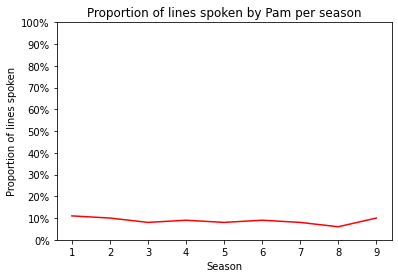

In [106]:
proportion_lines("Pam")